In [1]:
import tensorflow.keras.datasets.mnist as mnist
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

In [17]:
def convert2grayscale(img,qnt):
    fing=np.zeros(img.shape,dtype=np.uint8)
    for idx,q in enumerate(qnt):
        mask0=img<q
        fing+=(np.logical_and(img>q,np.logical_not(mask0))).astype(np.uint8)
    return fing

In [18]:
train,test=mnist.load_data()
train_x,train_y=train
test_x,test_y=test
del train, test

In [19]:
bins=2

q=np.quantile(train_x,np.linspace(0.,1.,bins+1)[1:-1],axis=0)

trainX=[convert2grayscale(img,q).flatten() for img in train_x]
testX=[convert2grayscale(img,q).flatten() for img in test_x]

np.savetxt("train{}X.txt".format(bins), trainX, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt("train{}Y.txt".format(bins), train_y, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

np.savetxt("test{}X.txt".format(bins), testX, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt("test{}Y.txt".format(bins), test_y, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

In [20]:
bins=4

q=np.quantile(train_x,np.linspace(0.,1.,bins+1)[1:-1],axis=0)

trainX=[convert2grayscale(img,q).flatten() for img in train_x]
testX=[convert2grayscale(img,q).flatten() for img in test_x]

np.savetxt("train{}X.txt".format(bins), trainX, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt("train{}Y.txt".format(bins), train_y, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

np.savetxt("test{}X.txt".format(bins), testX, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt("test{}Y.txt".format(bins), test_y, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

In [21]:
bins=8

q=np.quantile(train_x,np.linspace(0.,1.,bins+1)[1:-1],axis=0)

trainX=[convert2grayscale(img,q).flatten() for img in train_x]
testX=[convert2grayscale(img,q).flatten() for img in test_x]

np.savetxt("train{}X.txt".format(bins), trainX, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt("train{}Y.txt".format(bins), train_y, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

np.savetxt("test{}X.txt".format(bins), testX, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt("test{}Y.txt".format(bins), test_y, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

In [22]:
bins=16

q=np.quantile(train_x,np.linspace(0.,1.,bins+1)[1:-1],axis=0)

trainX=[convert2grayscale(img,q).flatten() for img in train_x]
testX=[convert2grayscale(img,q).flatten() for img in test_x]

np.savetxt("train{}X.txt".format(bins), trainX, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt("train{}Y.txt".format(bins), train_y, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

np.savetxt("test{}X.txt".format(bins), testX, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
np.savetxt("test{}Y.txt".format(bins), test_y, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

In [2]:
from lbsNN.preprocess import *
from lbsNN.postprocess import *

In [14]:
cwidth0=profile_data( parse_profile("train2X.profile") ).cumulative
cwidth1=profile_data( parse_profile("train2Y.profile") ).cumulative
M=np.load("train2Y_exp1.npy")
#f,M=ising_gauge([np.zeros(M.shape[0]),M],cwidth1,cwidth0)

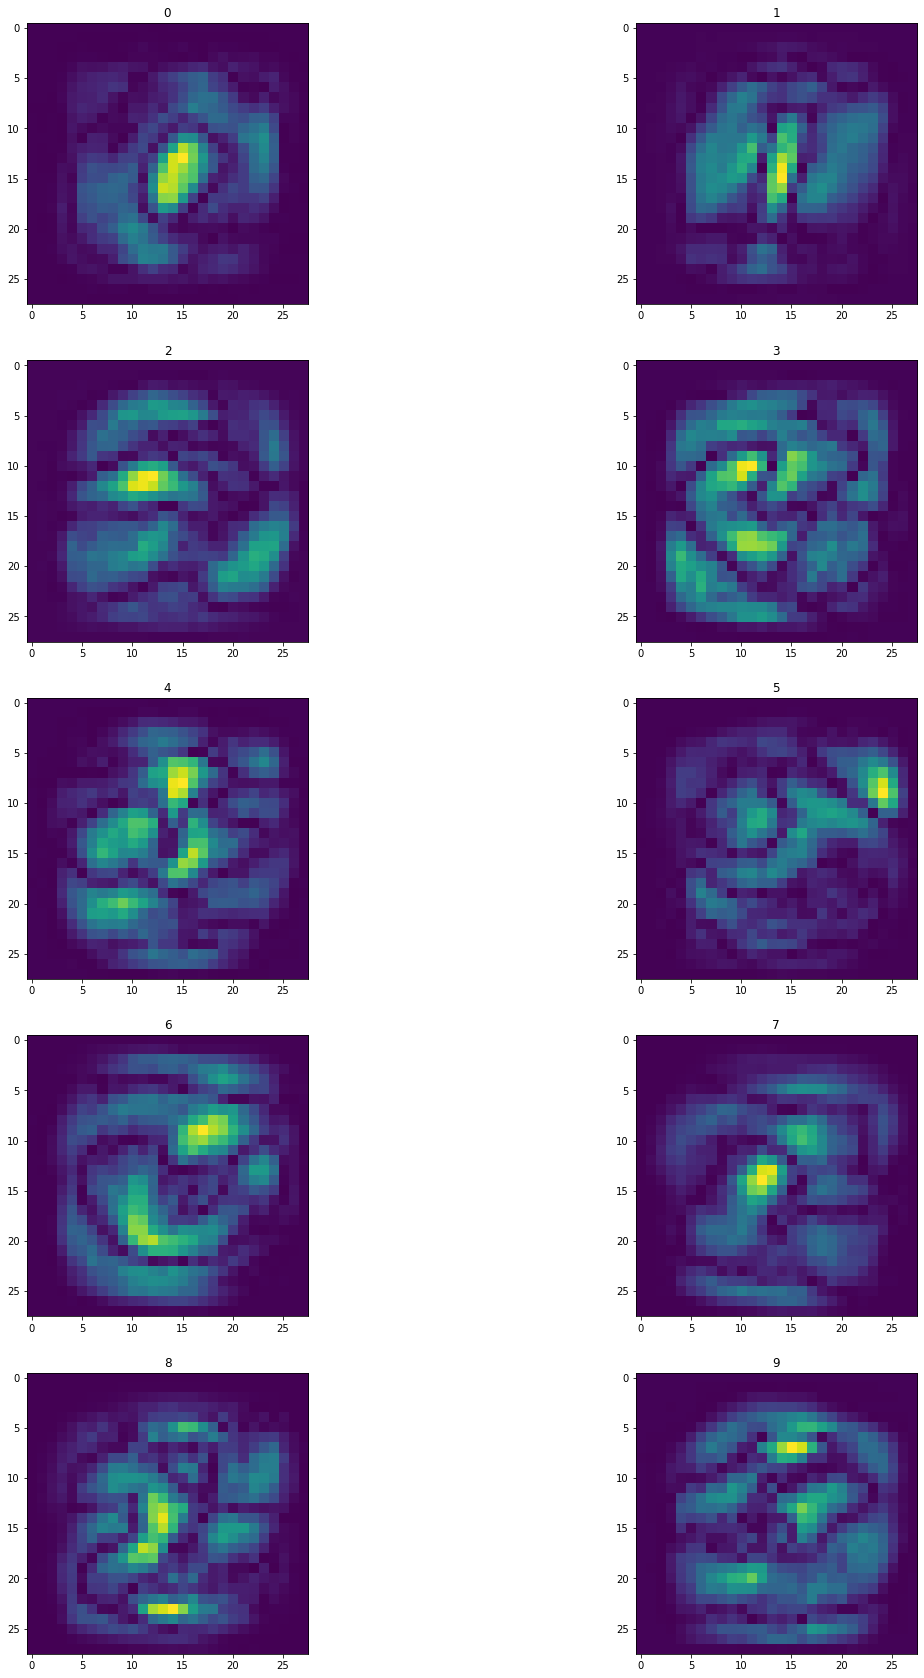

In [15]:
plt.rcParams['figure.figsize']=20,30
fig, axs = plt.subplots(5,2)
for s in range(M.shape[0]):
    s1=norm_score(M[s,:],cwidth0,[0,1])
    axs[int(s/2),np.mod(s,2)].imshow(s1.reshape(28,28))
    axs[int(s/2),np.mod(s,2)].set_title("{}".format(s))

In [36]:
def dualspace(mtx):
    mtx/=np.linalg.norm(mtx,axis=1)[:,np.newaxis]
    A=np.dot(mtx,mtx.T)
    S=np.linalg.inv(A)
    D=np.array([np.sum([S[i,j]*mtx[i,:] for i in range(mtx.shape[0])],axis=0) for j in range(mtx.shape[0])])
    return D

In [37]:
#mtx=np.random.random((10,200))
D=dualspace(M)
#print(D.shape)

In [38]:
D.shape

(10, 1501)

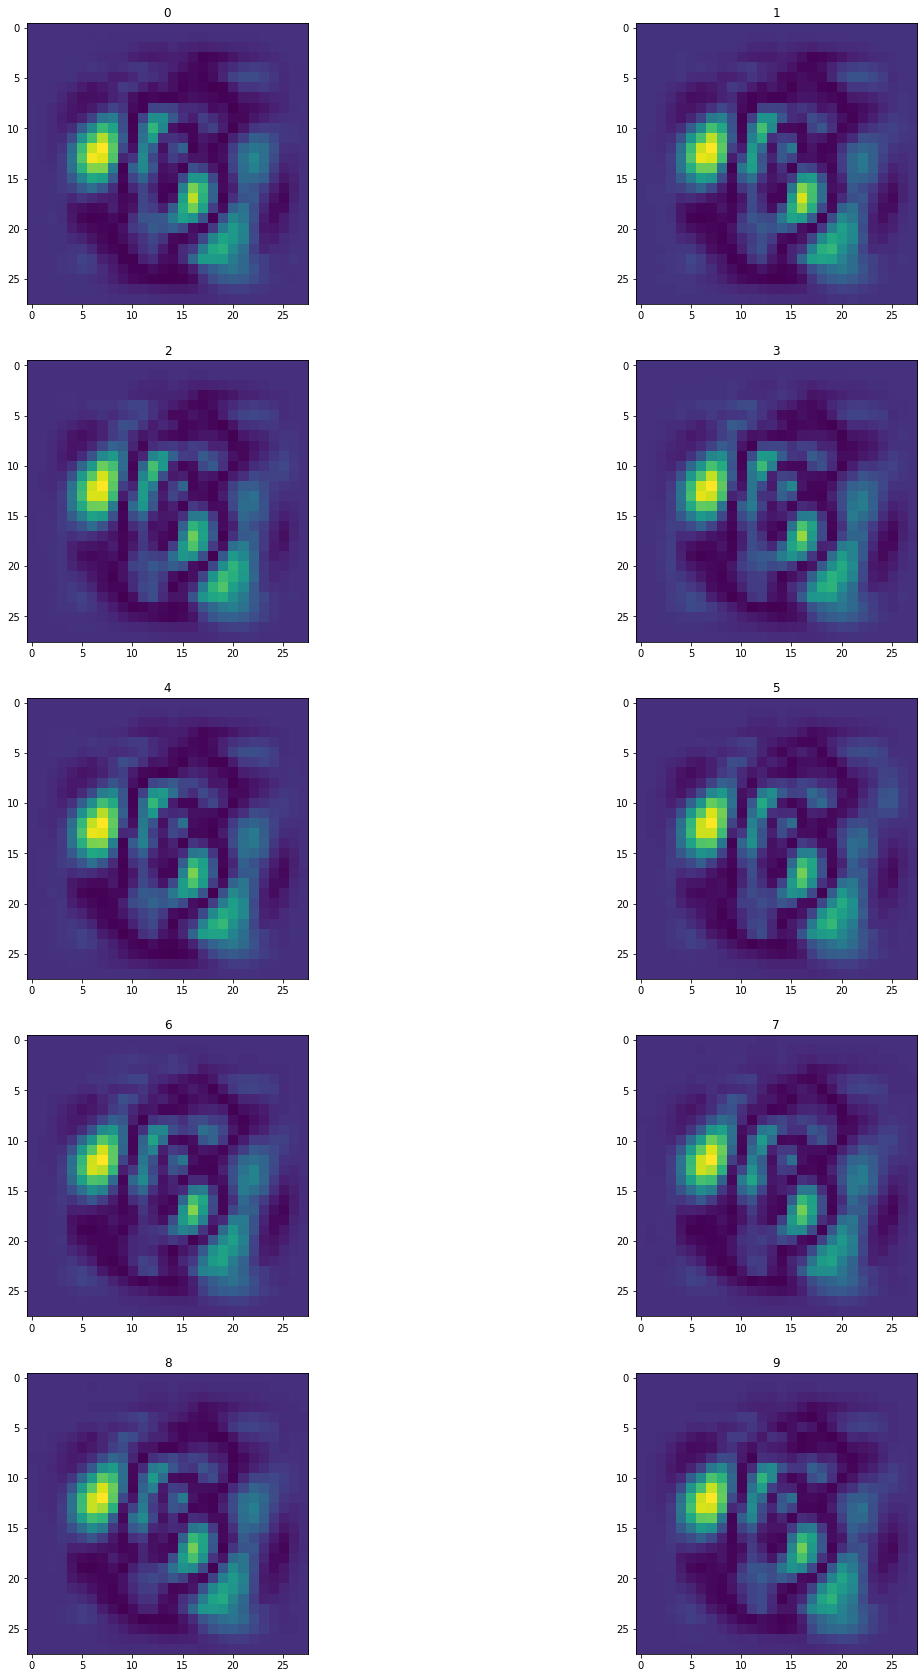

In [39]:
plt.rcParams['figure.figsize']=20,30
fig, axs = plt.subplots(5,2)
for s in range(M.shape[0]):
    s1=norm_score(D[s,:],cwidth0,[0,1])
    axs[int(s/2),np.mod(s,2)].imshow(s1.reshape(28,28))
    axs[int(s/2),np.mod(s,2)].set_title("{}".format(s))

In [40]:
f,D=ising_gauge([np.zeros(M.shape[0]),D],cwidth1,cwidth0)

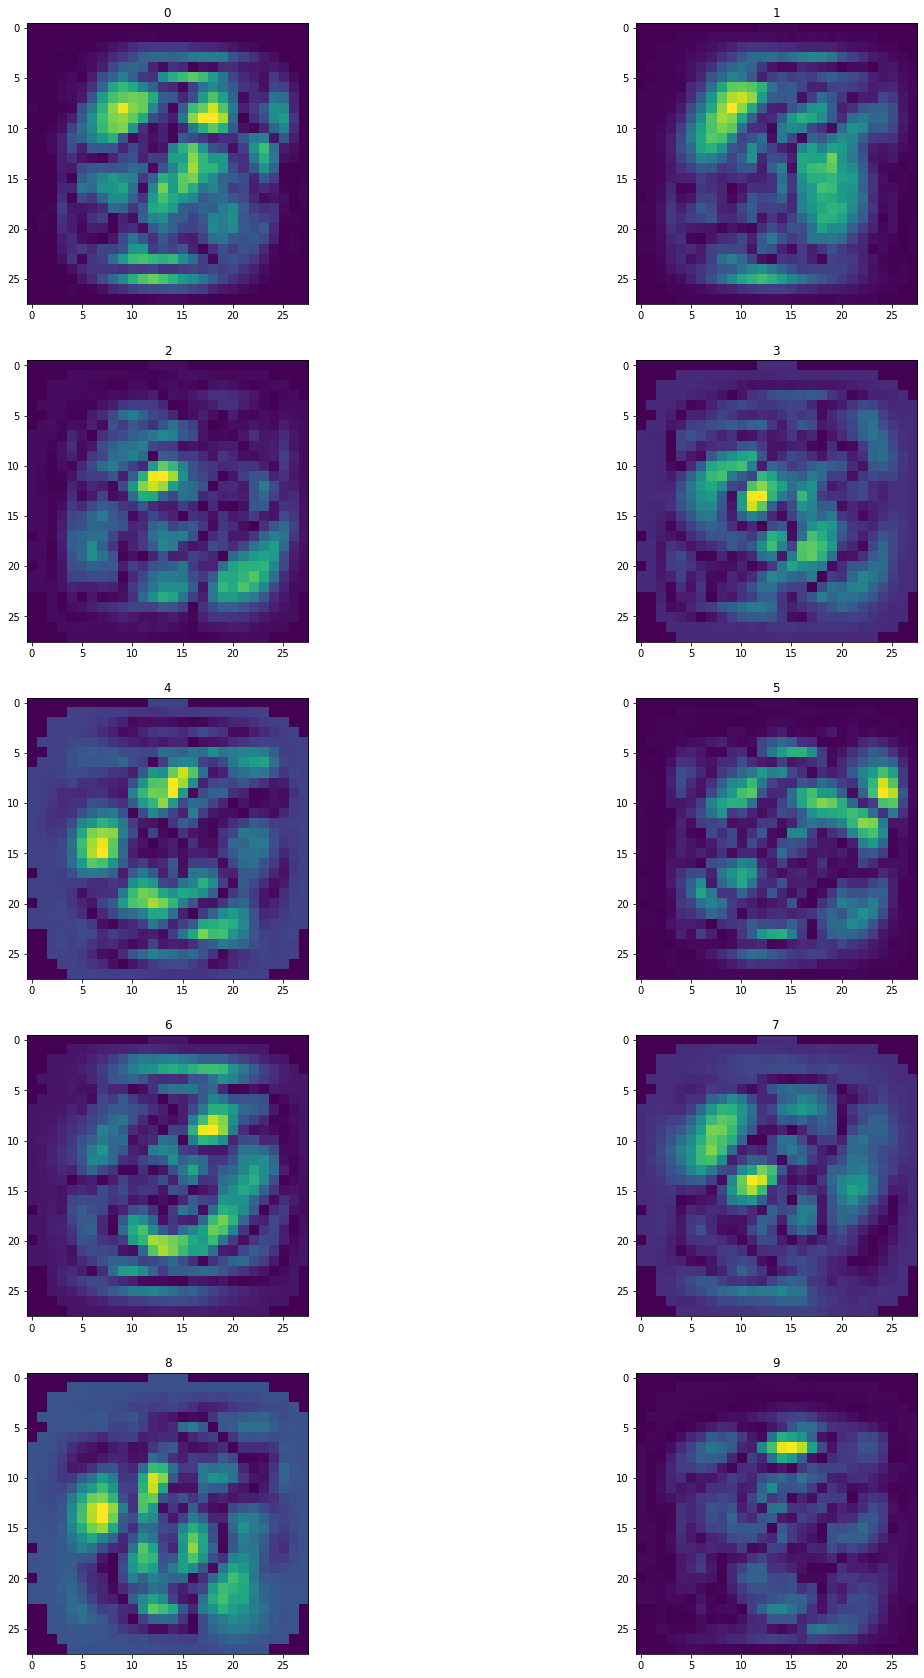

In [41]:
plt.rcParams['figure.figsize']=20,30
fig, axs = plt.subplots(5,2)
for s in range(M.shape[0]):
    s1=norm_score(D[s,:],cwidth0,[0,1])
    axs[int(s/2),np.mod(s,2)].imshow(s1.reshape(28,28))
    axs[int(s/2),np.mod(s,2)].set_title("{}".format(s))

In [11]:
np.mean(D,axis=1)

array([1.1317337e-09, 1.3501386e-09, 1.1118788e-09, 1.1515887e-09,
       1.0324589e-09, 9.3318397e-10, 1.1416612e-09, 1.3302835e-09,
       1.4295585e-09, 7.9419915e-10], dtype=float32)